<a href="https://colab.research.google.com/github/Staneering/Covid19-Vaccination-Forecasting/blob/main/Covid19VaccinationRateForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-dateutil
!pip install matplotlib

In [ ]:
import dateutil
import matplotlib.dates as mdates


# Investigate the error by checking if the module is installed
#print(f"matplotlib version: {mdates.__version__}")

# Fix the code by importing the AutoDateLocator class
from matplotlib.dates import AutoDateLocator

# Re-run the code with the imported class
majloc = AutoDateLocator(tz="UTC",interval_multiples=1)

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download data from OWID (replace with your download method)
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
data = pd.read_csv(url)



In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
data = data.set_index('date')

In [ ]:
data['location'].value_counts().to_dict()

{'Malaysia': 1579,
 'Asia': 1579,
 'World': 1579,
 'Lower middle income': 1579,
 'Czechia': 1579,
 'India': 1579,
 'Upper middle income': 1579,
 'Europe': 1578,
 'Greece': 1578,
 'High income': 1578,
 'Bulgaria': 1578,
 'European Union': 1578,
 'Lithuania': 1578,
 'Canada': 1577,
 'Bangladesh': 1577,
 'North America': 1577,
 'New Zealand': 1574,
 'Oceania': 1574,
 'Netherlands': 1574,
 'United States': 1573,
 'Italy': 1572,
 'Estonia': 1570,
 'Argentina': 1566,
 'Mexico': 1566,
 'Thailand': 1563,
 'Palau': 1562,
 'Palestine': 1562,
 'Panama': 1562,
 'Malta': 1562,
 'Papua New Guinea': 1562,
 'Oman': 1562,
 'Pakistan': 1562,
 'Paraguay': 1562,
 'Mali': 1562,
 'Northern Mariana Islands': 1562,
 'Peru': 1562,
 'Philippines': 1562,
 'Pitcairn': 1562,
 'Poland': 1562,
 'Portugal': 1562,
 'Puerto Rico': 1562,
 'Qatar': 1562,
 'Reunion': 1562,
 'Romania': 1562,
 'Russia': 1562,
 'Maldives': 1562,
 'Norway': 1562,
 'Mauritania': 1562,
 'North Macedonia': 1562,
 'North Korea': 1562,
 'Martiniqu

In [ ]:
data[data['location'] == 'Congo']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
73481,COG,Africa,Congo,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
73482,COG,Africa,Congo,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
73483,COG,Africa,Congo,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
73484,COG,Africa,Congo,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
73485,COG,Africa,Congo,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75038,COG,Africa,Congo,2024-04-10,25217.0,0.0,0.143,389.0,0.0,0.0,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
75039,COG,Africa,Congo,2024-04-11,25217.0,0.0,0.143,389.0,0.0,0.0,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
75040,COG,Africa,Congo,2024-04-12,25217.0,0.0,0.143,389.0,0.0,0.0,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
75041,COG,Africa,Congo,2024-04-13,25217.0,0.0,0.143,389.0,0.0,0.0,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN


In [ ]:
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-08,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-09,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


<ipython-input-5-52ac286ce349>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases["new_cases"] = pd.to_numeric(confirmed_cases["new_cases"], errors="coerce")
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index h

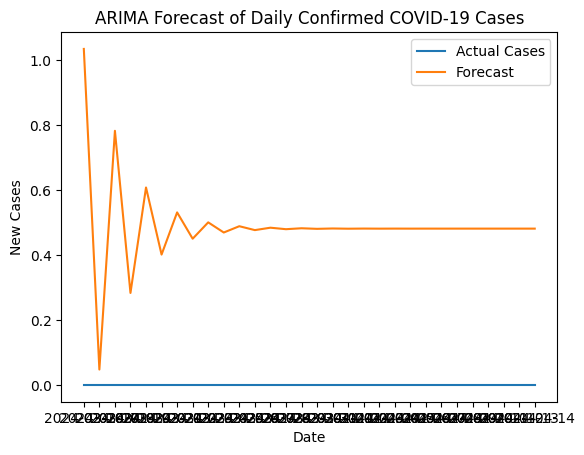

Forecast for the next 30 days:
394113    1.035637
394114    0.047462
394115    0.783244
394116    0.283505
394117    0.608600
394118    0.401792
394119    0.531759
394120    0.450637
394121    0.501076
394122    0.469784
394123    0.489172
394124    0.477169
394125    0.484597
394126    0.480001
394127    0.482844
394128    0.481085
394129    0.482173
394130    0.481500
394131    0.481917
394132    0.481659
394133    0.481818
394134    0.481720
394135    0.481781
394136    0.481743
394137    0.481767
394138    0.481752
394139    0.481761
394140    0.481756
394141    0.481759
394142    0.481757
Name: predicted_mean, dtype: float64


In [ ]:
# Focus on confirmed cases data (modify as needed)
confirmed_cases = data[["date", "new_cases"]]

# Set the date as the index for time series analysis
confirmed_cases.set_index("date", inplace=True)

# Convert the "new_cases" column to numeric (assuming it's an integer)
confirmed_cases["new_cases"] = pd.to_numeric(confirmed_cases["new_cases"], errors="coerce")

# Define the ARIMA model order (p, d, q) based on data analysis (replace with your choice)
model = ARIMA(confirmed_cases["new_cases"], order=(2, 1, 2))

# Train the model on the existing data
model_fit = model.fit()

# Define the forecast horizon (number of days to predict)
forecast_horizon = 30

# Generate the forecast
forecast = model_fit.forecast(steps=forecast_horizon)

# Prepare data for plotting (actual vs. forecast)
actual_dates = confirmed_cases.index.to_numpy()[-forecast_horizon:]
actual_cases = confirmed_cases["new_cases"].to_numpy()[-forecast_horizon:]

# Plot the actual data and the forecast
plt.plot(actual_dates, actual_cases, label="Actual Cases")
plt.plot(actual_dates, forecast, label="Forecast")
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("ARIMA Forecast of Daily Confirmed COVID-19 Cases")
plt.show()

# Print the forecast values (optional)
print("Forecast for the next", forecast_horizon, "days:")
print(forecast)


In [ ]:
confirmed_cases.value_counts()

new_cases 
0.0           342864
1.0              954
2.0              728
3.0              567
4.0              447
               ...  
13484.0            1
13485.0            1
13490.0            1
13498.0            1
44236227.0         1
Name: count, Length: 14074, dtype: int64

In [ ]:
nig_data=data[data['location']=='Nigeria']

nig_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 2020-01-05 to 2024-04-14
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1562 non-null   object 
 1   continent                                   1562 non-null   object 
 2   location                                    1562 non-null   object 
 3   total_cases                                 1506 non-null   float64
 4   new_cases                                   1562 non-null   float64
 5   new_cases_smoothed                          1557 non-null   float64
 6   total_deaths                                1478 non-null   float64
 7   new_deaths                                  1562 non-null   float64
 8   new_deaths_smoothed                         1557 non-null   float64
 9   total_cases_per_million                     1506 non-null   float64
 10  ne

In [ ]:
nig_data[['new_vaccinations_smoothed','new_people_vaccinated_smoothed']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 2020-01-05 to 2024-04-14
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   new_vaccinations_smoothed       976 non-null    float64
 1   new_people_vaccinated_smoothed  976 non-null    float64
dtypes: float64(2)
memory usage: 36.6+ KB


In [ ]:
nig_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 2020-01-05 to 2024-04-14
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1562 non-null   object 
 1   continent                                   1562 non-null   object 
 2   location                                    1562 non-null   object 
 3   total_cases                                 1506 non-null   float64
 4   new_cases                                   1562 non-null   float64
 5   new_cases_smoothed                          1557 non-null   float64
 6   total_deaths                                1478 non-null   float64
 7   new_deaths                                  1562 non-null   float64
 8   new_deaths_smoothed                         1557 non-null   float64
 9   total_cases_per_million                     1506 non-null   float64
 10  ne

In [ ]:
nig_data_num['tests_performed'] = pd.to_numeric(nig_data_num['tests_performed'], errors='coerce')

NameError: name 'nig_data_num' is not defined

In [ ]:
transposed_df = nig_data_num.transpose()
for column_name in transposed_df.index:
    if transposed_df.loc[column_name].iloc[0] == 'tests performed':
        print(f"'tests performed' is a row in column: {column_name}")

In [ ]:
for column_name in nig_data_num.columns:


  print(nig_data_num[nig_data_num[column_name].isin(['tests performed'])])

Empty DataFrame
Columns: [date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, 

<Axes: xlabel='date'>

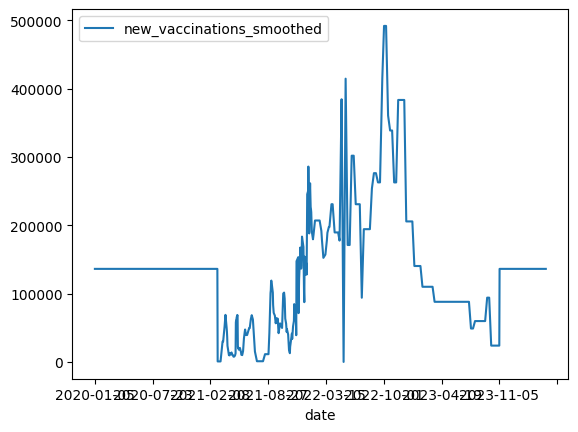

In [ ]:
hospitalized = nig_data[['new_vaccinations_smoothed']]
hospitalized = hospitalized.fillna(nig_data[['new_vaccinations_smoothed']].mean())

hospitalized.plot()

In [ ]:
for index, row in nig_data_num.iterrows():
    # Check if any value in the row is equal to 'tests performed'
    if 'tests performed' in row.values:
        # Delete the row using the index
        nig_data_num.drop(index=index, inplace=True)
        print('done')


In [ ]:
print(nig_data_num.columns.tolist())

['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoo

In [ ]:
nig_data_num.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN
2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN
2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN
2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN
2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
nig_data_num = nig_data.drop(['iso_code','continent','location'],axis=1)

#nig_data_num['date'] = nig_data_num['date'].astype(str)

for column_name in nig_data_num.columns:
  nig_data_num[column_name] = pd.to_numeric(nig_data_num[column_name], errors='coerce')


#nig_data_num.set_index('date')
corr = nig_data_num.corr()
hospcorr = corr['new_vaccinations_smoothed']
hospcorr = hospcorr[np.abs(hospcorr)>0.4]
hospcorr.sort_values()

stringency_index                             -0.808635
total_boosters_per_hundred                   -0.475160
total_boosters                               -0.474970
people_vaccinated                             0.500024
people_vaccinated_per_hundred                 0.500041
total_vaccinations_per_hundred                0.520952
total_vaccinations                            0.520954
total_cases                                   0.535799
total_cases_per_million                       0.535799
total_deaths_per_million                      0.542128
total_deaths                                  0.542143
new_vaccinations                              0.708882
new_people_vaccinated_smoothed_per_hundred    0.873089
new_people_vaccinated_smoothed                0.873154
total_tests                                   0.880540
total_tests_per_thousand                      0.880541
new_vaccinations_smoothed_per_million         1.000000
new_vaccinations_smoothed                     1.000000
Name: new_

In [ ]:
nig_data_num.columns


Index(['date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vacc

In [ ]:
majloc = AutoDateLocator(tz="UTC",interval_multiples=self._interval_multiples)

NameError: name 'AutoDateLocator' is not defined

In [ ]:
exogfeats = nig_data[['stringency_index','total_deaths_per_million','total_cases_per_million']]
#exogfeats.set_index('date')

for column in exogfeats.columns:
  exogfeats[column]= exogfeats[column].fillna(exogfeats[column].mean())


exogfeats = exogfeats.iloc[(exogfeats.index >= hospitalized.first_valid_index()) & (exogfeats.index<= hospitalized.last_valid_index())]



<ipython-input-86-2498adbf692a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exogfeats[column]= exogfeats[column].fillna(exogfeats[column].mean())


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

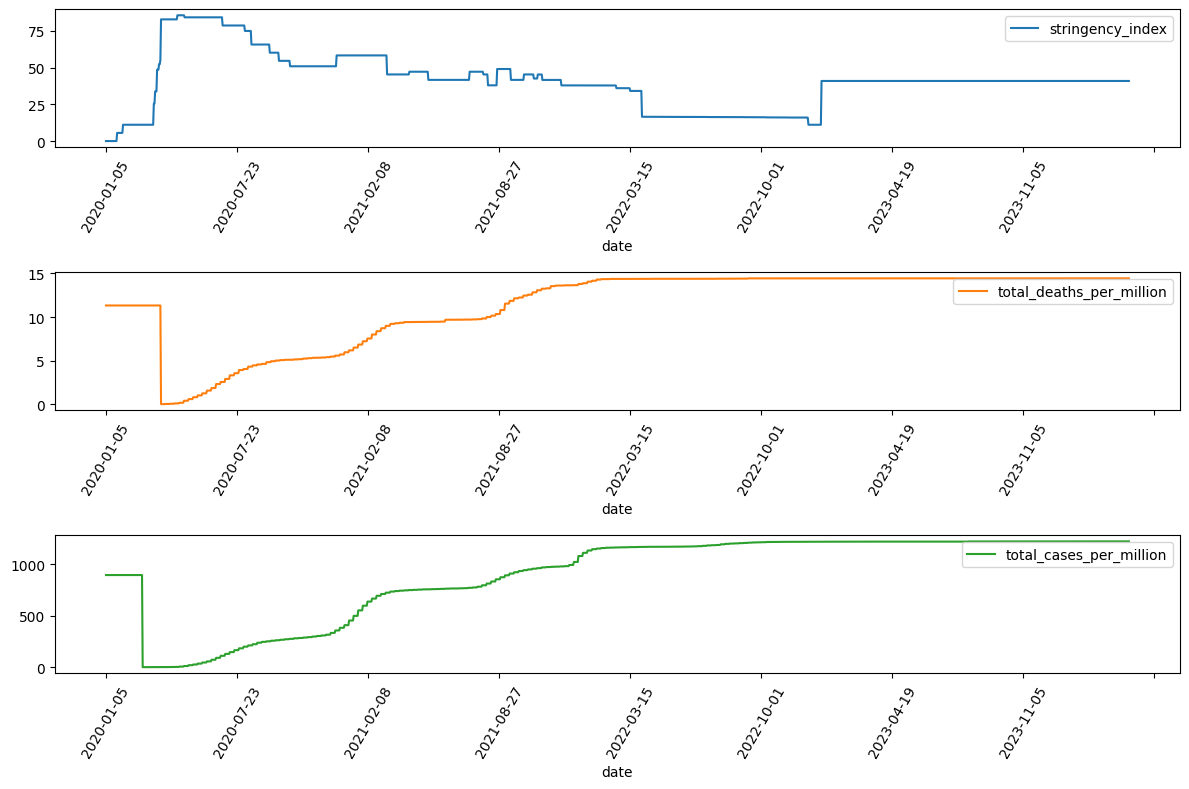

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True)
exogfeats.plot(ax=ax, subplots=True, rot=60)

In [ ]:
#nig_data.set_index('date')


model = ARIMA(hospitalized,order= (2,1,2),exog=exogfeats).fit()
predictions = model.predict()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                 1562
Model:                        ARIMA(2, 1, 2)   Log Likelihood              -16509.543
Date:                       Thu, 02 May 2024   AIC                          33035.087
Time:                               12:48:40   BIC                          33077.911
Sample:                           01-05-2020   HQIC                         33051.009
                                - 04-14-2024                                         
Covariance Type:                         opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
stringency_index            23.4344    554.071      0.042      0.966   -1062.524    1109.393
total_deaths_per_million   158.0937    687.248      0.230      0.818   -1188.887    1505.075
total_cases_per_million     18.0497      6.101      2.958      0.003       6.091      30.008
ar.L1                       -0.4210      0.029    -14.578      0.000      -0.478      -0.364
ar.L2                        0.4784      0.028     17.067      0.000       0.423       0.533
ma.L1                        0.7809      0.031     25.077      0.000       0.720       0.842
ma.L2                       -0.1096      0.029     -3.809      0.000      -0.166      -0.053
sigma2                    8.922e+07      0.019   4.68e+09      0.000    8.92e+07    8.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):            308973.73
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.15e+23. Standard errors may be unstable.
"""

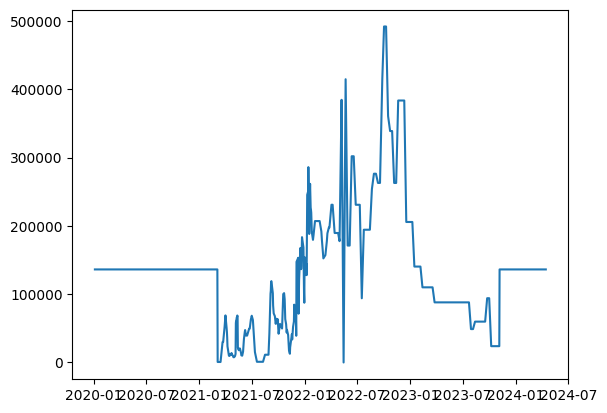

In [ ]:
import pytz
# Convert the index to a DatetimeIndex
hospitalized.index = pd.to_datetime(hospitalized.index)

# Remove timezone information
hospitalized.index = hospitalized.index.tz_localize(None)

# Plot the hospitalized DataFrame
plt.plot(hospitalized)

In [ ]:
hospitalized.index.dtype

dtype('O')

TypeError: tz must be string or tzinfo subclass.

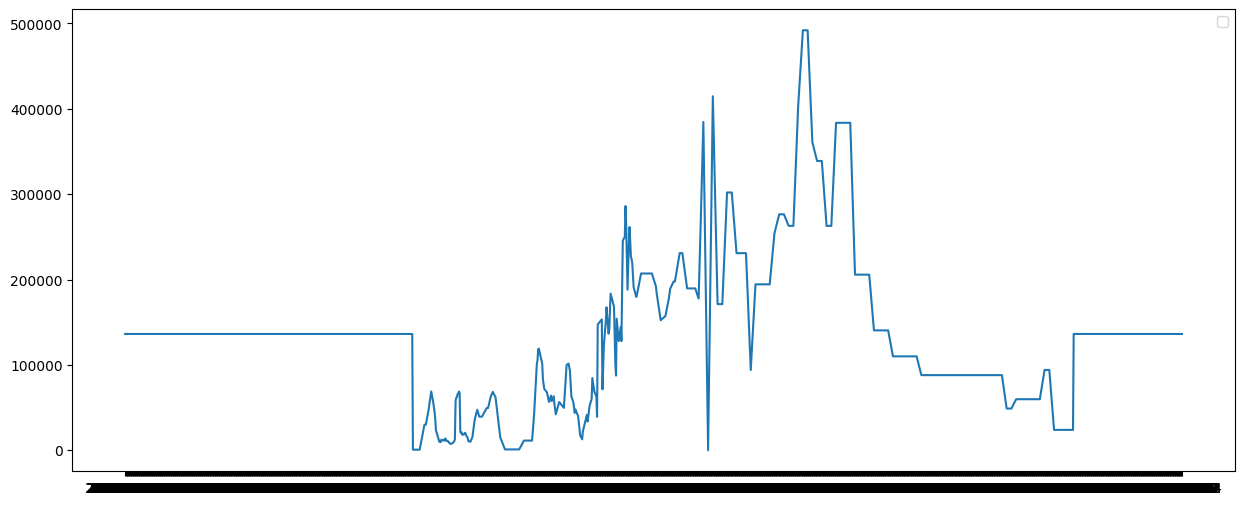

In [ ]:
plt.figure(figsize=(15,6))
plt.legend(["a","b"])
plt.plot(hospitalized)
plt.plot(predictions[1:])
plt.show()

In [ ]:
test_length = 5
train = hospitalized[:-test_length]
test = hospitalized[-test_length:]
train_exog = exogfeats[:-test_length]
test_exog = exogfeats[-test_length:]
model = ARIMA(train,order= (2,1,2),exog=train_exog).fit()

ValueError: The indices for endog and exog are not aligned

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: tz must be string or tzinfo subclass.

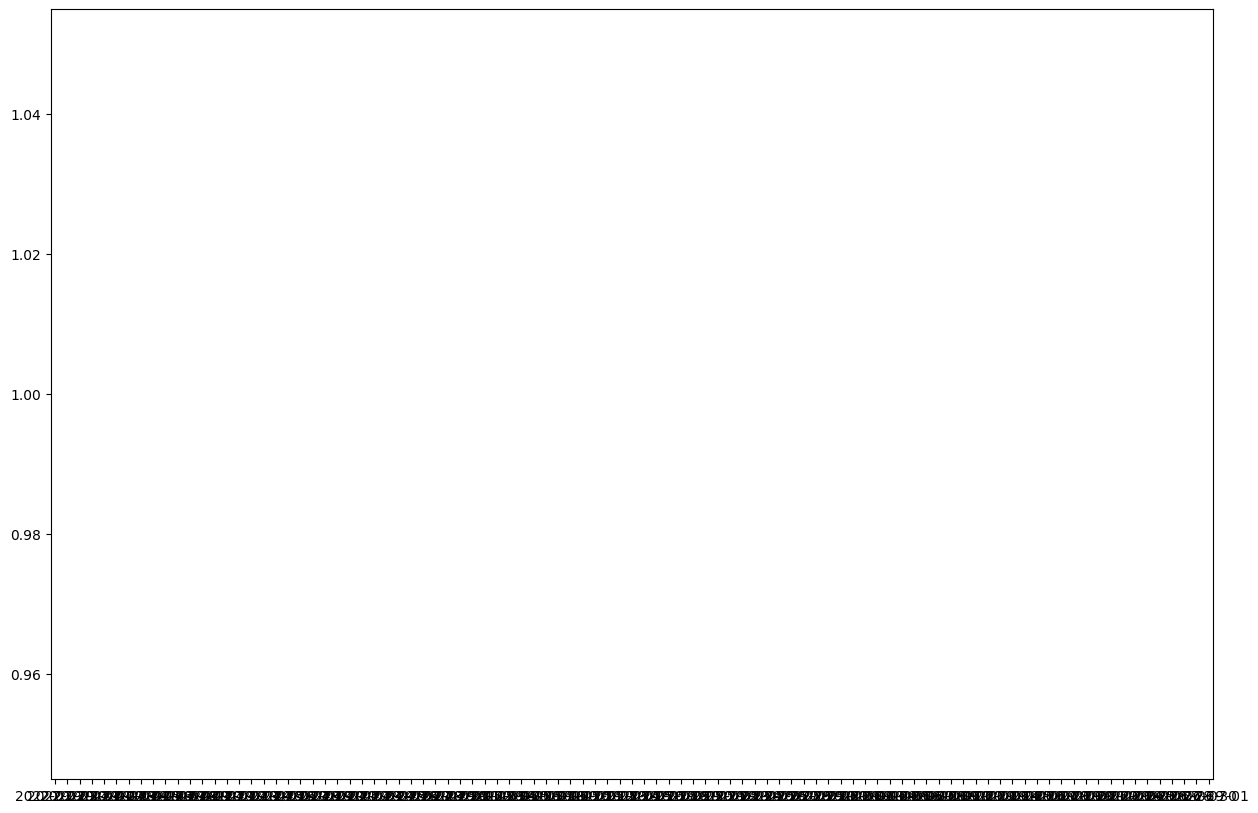

In [ ]:
predictions = model.get_forecast(5,exog = test_exog,alpha = 0.95)
plt.figure(figsize=(15,10))
plt.plot(np.exp(train))
plt.plot(np.exp(predictions.predicted_mean))
plt.plot(np.exp(test))
conf= predictions.conf_int(alpha=0.05)
upper = np.exp(conf['lower new_vaccinations_smoothed'])
lower = np.exp(conf['upper new_vaccinations_smoothed'])
plt.fill_between(upper.index, upper,lower, color='b', alpha=.1)

we will check for variables that have good correlation with the vaccinations i.e .0.4 we will use them as exogenous variables, fill them with the mean and then do our prediction, perform stationarity test optional.

In [ ]:
confirmed_cases.describe()

,new_cases
count,3.830560e+05
mean,8.578437e+03
std,2.375786e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.423623e+07


In [ ]:
nig_data.index = nig_data['date']
nig_data.loc[:, 'date'] = pd.to_datetime(nig_data['date'])

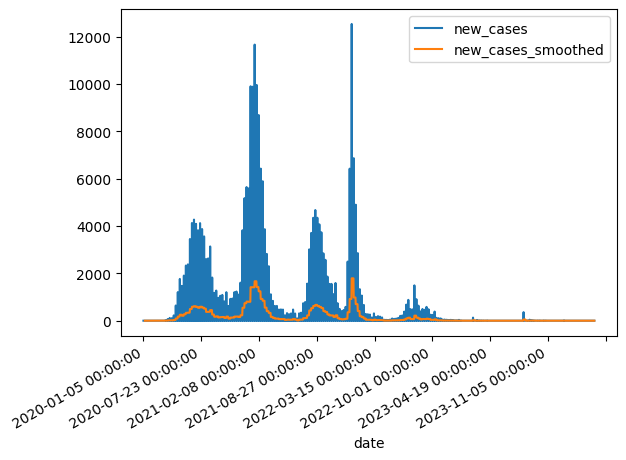

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
nig_data[fields].plot()
plt.show()
plt.savefig('smooth.png')

In [ ]:

nig_data[fields].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 2020-01-05 00:00:00 to 2024-04-14 00:00:00
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           1562 non-null   float64
 1   new_cases_smoothed  1557 non-null   float64
dtypes: float64(2)
memory usage: 68.9+ KB
